### HW5 Extra Credit

The problem statement involves using the various attributes captured in the (https://www.kaggle.com/miroslavsabo/young-people-survey/) dataset and predicting how empathetic a person is based on the responses they provide.<br>
Let's start by loading the data, from the responses.csv

In [6]:
import util
import numpy as np
data = util.load_data()
data.head()

Loading data from responses.csv


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


Now that we have successfully loaded the data lets take a quick look at the missing values in the data for each column.


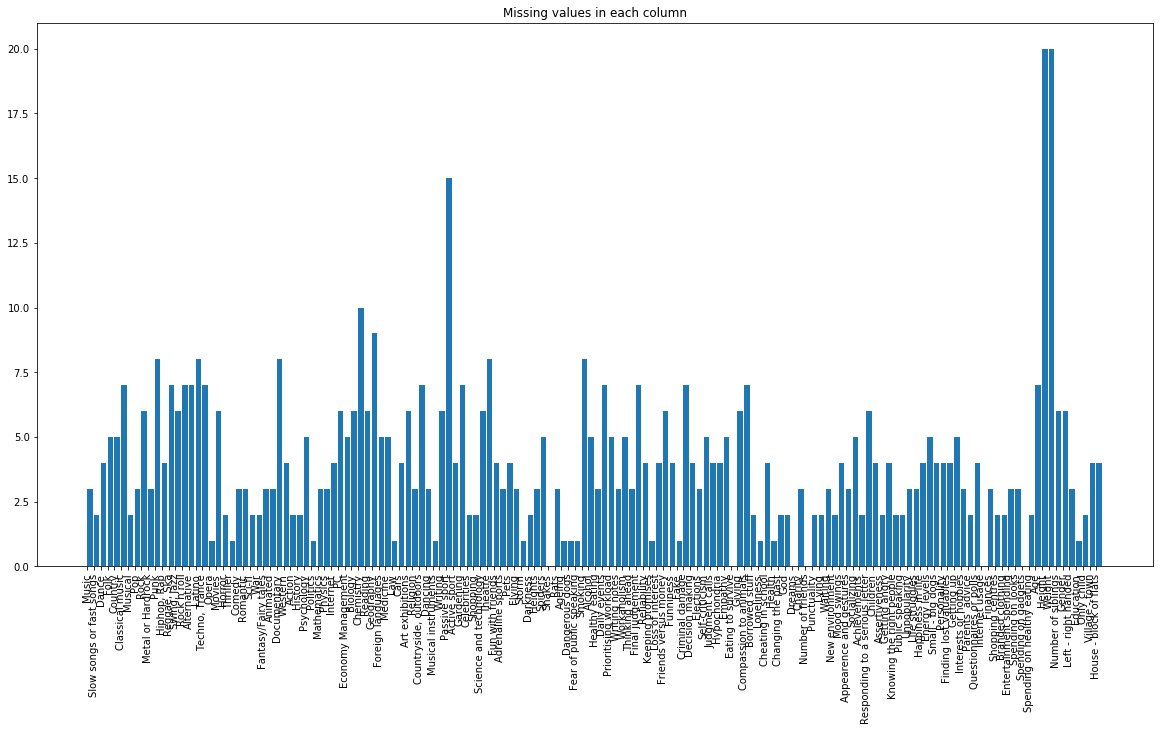

In [31]:
import matplotlib.pyplot as plt
missing_values = []
for column in data.columns:
    missing_values.append(data[column].isnull().sum())
plt.figure(figsize=(20,10))
plt.bar(data.columns,missing_values,align='edge')
plt.xticks(rotation=90)
plt.title("Missing values in each column")
plt.show()

Now that we have identified the numeber of missing values for each attribute, lets start the preprocessing of the data by calling the function util.preprocess_data() that takes care of all the missing values.

In [13]:
preprocessed_data = util.preprocess_data(data)

Identified 139 numeric attributes from the dataset
['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action', 'History', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry', 'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 'Active sport', 'Gardening', 'Celebrities', 'Shopping', 'Science and technology', 'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs

As you can see that the function identifies all the numeric and categorical attributes and preprocesses them accordingly:<br>
 1. For numeric feature we replace the missing values with column mean<br>
 2. For categorial features we replace the missing values with mode of the column<br>

We can verify that the missing values are completely replaced by running checking the sum of null values on the DataFrame

In [35]:
preprocessed_data.isnull().any().sum()

0

Once we have the data preprocessed data we will split the data into label (Empathy) and features (all remaining columns)

In [37]:
X,Y = util.splitFeaturesAndLabel(preprocessed_data,'Empathy')

Setting Label to Empathy for classification
Dropping the label column from feature set
Returning 149 features and label = Empathy for classification


We now create a training set and test set for our data

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42)

Post splitting the data we run our BaselinePredictor (defined in baseline.py) for generating predictions based on the following logic:<br>
train: learns the median label value from the training data<br>
predict: returns the median value of training data for each test data point<br>

In [42]:
from baseline import BaselinePredictor
baseline_predictor = BaselinePredictor()
baseline_preds = util.trainAndPredict(X_train,Y_train,baseline_predictor,X_test)

Training on model: <baseline.BaselinePredictor object at 0x000002D1C932AB70>
Training Baseline Classifier on 757 examples
Setting the value of self.label to median of Y
Predicting for test data:
Returning predictions


We now evaluate the predictions obtained from the BaselinePredictor and print out the classification report for the same

In [44]:
util.printAccuracyAndClassficationReport(baseline_preds,Y_test,classes=['1','2','3','4','5'])

Accuracy for predictions: 0.30434782608695654
Classification Report:
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         9
          2       0.00      0.00      0.00        25
          3       0.00      0.00      0.00        59
          4       0.30      1.00      0.47        77
          5       0.00      0.00      0.00        83

avg / total       0.09      0.30      0.14       253



C:\Users\vedpa\Anaconda3\envs\ipykernel_py3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


As we can see that the accuracy using the BaselinePredictor is quite low, hence we do some feature selection to just select the best features and use SVC for better classification accuracy.<br>
We extract the best features based on the training data, and transform our training and test set to just include the best features we just identified

In [50]:
X_train,X_test = util.getBestFeatures(X_train,Y_train,X_test)

Getting RFE rankings for RandomForestClassifier
Getting RFE rankings for ExtraTreesClassifier
Getting RFE rankings for Lasso
Extracted 72 best features from the training data
Transforming X_train and X_test to only include the best features picked


The best features identified from the above function to predict Empathy are:

In [53]:
for column in X_train.columns:
    print(column)

Weight
Spending on gadgets
Theatre
Fantasy/Fairy tales
Psychology
Loss of interest
Writing notes
Final judgement
Getting angry
Reading
Decision making
Biology
Self-criticism
Latino
Finding lost valuables
Active sport
War
History
Eating to survive
Workaholism
Charity
Fake
Romantic
Borrowed stuff
Horror
Western
PC
Gardening
Life struggles
Questionnaires or polls
Law
Branded clothing
Animated
Children
Number of friends
Judgment calls
Heights
God
Height
Public speaking
Responding to a serious letter
Age
Assertiveness
Socializing
Friends versus money
Physics
Interests or hobbies
Pets
Mathematics
Giving
Getting up
Changing the past
Smoking
Achievements
Small - big dogs
Compassion to animals
Appearence and gestures
Celebrities
Snakes
Entertainment spending
Countryside, outdoors
Unpopularity
Loneliness
Elections
Ageing
Swing, Jazz
Rats
Dreams
Spending on healthy eating
Spiders
Religion
Dangerous dogs


Post identifying the best features we would now use RBF kernel SVC to make the predictions.

In [55]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')

To tune the model's hyperparameters we would use the following params for GridSearchCV

In [57]:
params = {'C':[i for i in range(1,11)],
          'gamma':[0.1,0.01,0.001,0.0001,0.00099,0.000099]}
best_params = util.getBestHyperParameters(model,X_train,Y_train,params)

Performing grid search for model: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
With hyper parameter options: {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'gamma': [0.1, 0.01, 0.001, 0.0001, 0.00099, 9.9e-05]}
Returning best params: {'C': 8, 'gamma': 0.00099}


We would now use the hyperparameters obtained from the above GridSearch results to tune our model to make our final predictions on the model and print the performance metrics obtained

In [59]:
model = SVC(kernel='rbf',C=8,gamma=0.00099)
preds = util.trainAndPredict(X_train,Y_train,model,X_test)
util.printAccuracyAndClassficationReport(preds,Y_test,classes=['1','2','3','4','5'])

Training on model: SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.00099, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting for test data:
Returning predictions
Accuracy for predictions: 0.4150197628458498
Classification Report:
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         9
          2       0.33      0.20      0.25        25
          3       0.36      0.24      0.29        59
          4       0.39      0.36      0.38        77
          5       0.46      0.70      0.55        83

avg / total       0.39      0.42      0.39       253



As we can see by selecting better features and using a model with tuned hyperparameters help increase the accuracy over our BaselinePredictor.<br>
